# Homework 4 - Data visualization
By: Lynsey Kovar
## Part 1 - Loading packages / data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanicDataset = sns.load_dataset("titanic")
titanicDataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Part 2 - Missing data exploration

,Column,Total,NAs
survived,survived,891,0
pclass,pclass,891,0
sex,sex,891,0
age,age,891,177
sibsp,sibsp,891,0
parch,parch,891,0
fare,fare,891,0
embarked,embarked,891,2
class,class,891,0
who,who,891,0


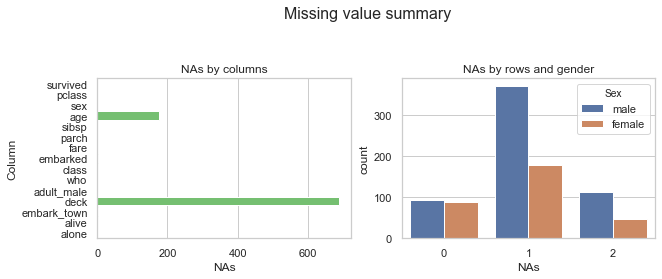

In [13]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(321)
ax2 = fig1.add_subplot(322)
fig1.suptitle("Missing value summary", fontsize = 16)
ax1.set_title("NAs by columns")
ax2.set_title("NAs by rows and gender")

# make dataframe indicating T/F for NaNs at each position
titanicMissing = titanicDataset.isnull()

# make dataframe with column name, total observations, and number of NAs
missingToPlot = pd.DataFrame(columns = ['Column', 'Total', 'NAs'])
for column in titanicMissing:
    tempRow = pd.DataFrame({'Column':[column],
                            'Total':[titanicMissing[column].count()],
                            'NAs':[len(titanicMissing[titanicMissing[column] == True])]},
                            index=[column])
    missingToPlot = missingToPlot.append(tempRow)

# table representation of missing values per column
display(missingToPlot)

# make horizontal barplot for amount of NA values per column
# initialize figure
sns.set(style="whitegrid")
sns.set_color_codes("muted")
p_columnMissing = sns.barplot(x='NAs', y='Column', data=missingToPlot, label='NAs', color='g', ax=ax1)
# make barplot for amount of missing data per passenger - displayed by gender

# first make dataframe
missingPerRow = titanicDataset.isnull().sum(axis=1).tolist()
missingToPlot_row = pd.DataFrame({'NAs':missingPerRow, 'Sex':titanicDataset['sex']})

# then make vertical barplot
p_rowMissing = sns.countplot(x='NAs', hue='Sex', data=missingToPlot_row, ax=ax2)

## Part 3 - Survival exploration

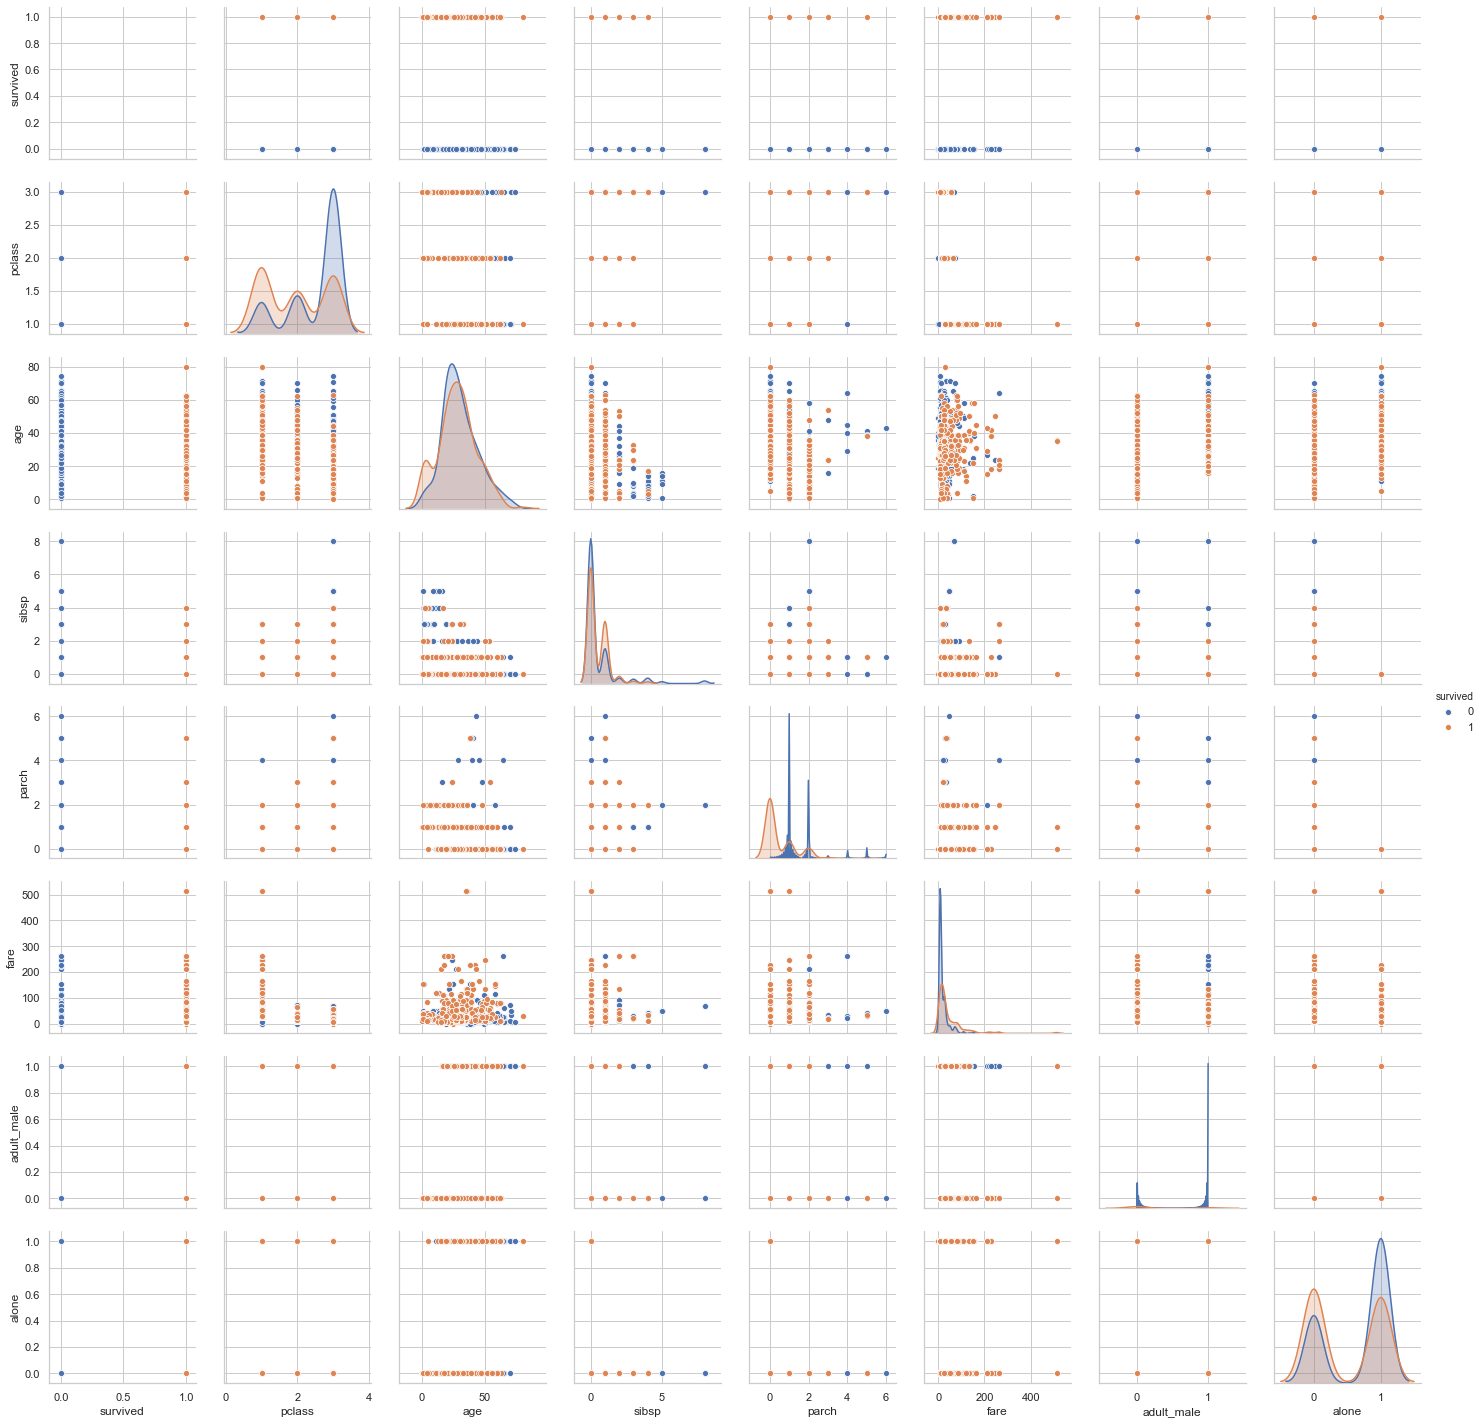

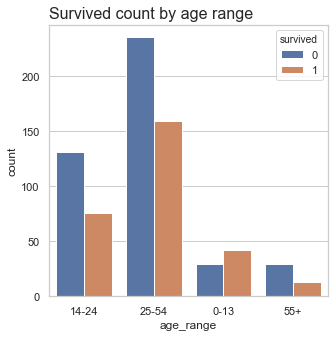

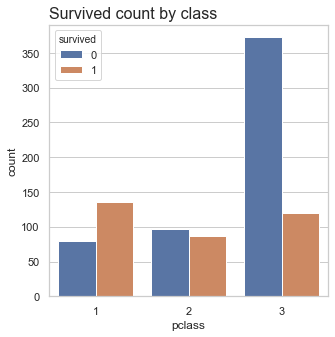

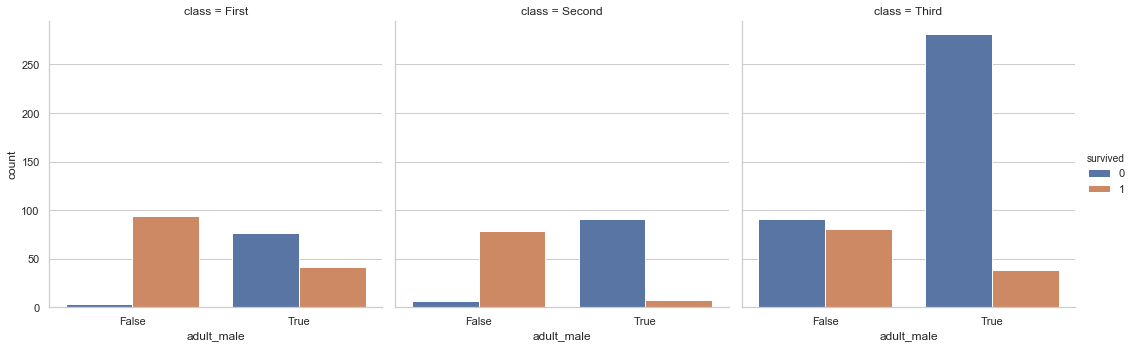

In [24]:
# make pair plot comparing distributions and correlations for all numeric variables
fig2 = sns.pairplot(titanicDataset, hue = 'survived', dropna=True)
display(fig2)

# make bar plot of survival for age groups child, young adult, adult, older adult
# first, making new category for age
def ageClassify(c):
    if c['age'] < 14:
        return '0-13'
    if c['age'] >= 14 and c['age'] < 25:
        return '14-24'
    if c['age'] >= 25 and c['age'] < 55:
        return '25-54'
    if c['age'] >= 55:
        return '55+'

titanicDataset['age_range'] = titanicDataset.apply(ageClassify, axis=1)

fig3 = plt.figure(figsize=(5,5))
ax3 = fig3.add_subplot(111)
plt.title("Survived count by age range", fontsize = 16, loc="left")
sns.countplot(x = 'age_range', hue = 'survived', data = titanicDataset, ax=ax3)

# plot survival by class
fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_subplot(111)
plt.title("Survived count by class", fontsize = 16, loc="left")
sns.countplot(x = 'pclass', hue = 'survived', data = titanicDataset, ax=ax4)

# plot survival by adult male true/false and class
fig5 = sns.catplot(x='adult_male', hue='survived', col='class', data=titanicDataset, kind='count')
plt.show(fig5)
